# Projet 9 : Etude de marché  avec Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from pandas.plotting import parallel_coordinates
import seaborn as sns
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import time

In [2]:
étude_marché_volailles_complete = pd.read_csv('/Users/user/Desktop/OPENCLASSROOM/MASTER 1 DATA ANALYST/Projet_9/étude marché volailles.csv')
étude_marché_volailles_complete

,Unnamed: 0,Zone,Exportations Volailles,Importation Volailles,Nourriture Volailles,Exportations Total,Importation Total,Nourriture Total,Taux export volailles,Taux import volailles,Taux conso volailles,Valeur en Millions Habitant,Taux évolution Population 10 ans,Stabilité Politique,PIB
0,1,Afrique du Sud,63.0,514.0,2035.0,10968.0,9020.0,31726.0,0.574398,5.698448,6.414297,57.009756,16.062776,-0.28,6121.876572
1,2,Albanie,0.0,38.0,47.0,156.0,884.0,3631.0,0.000000,4.298643,1.294409,2.884169,-4.938335,0.38,4514.204908
2,3,Algérie,0.0,2.0,264.0,743.0,19718.0,33056.0,0.000000,0.010143,0.798645,41.389189,21.138007,-0.92,4109.696001
3,4,Allemagne,646.0,842.0,1609.0,58793.0,66550.0,77988.0,1.098770,1.265214,2.063138,82.658409,1.698592,0.59,44651.829102
4,5,Angola,0.0,277.0,315.0,60.0,4153.0,17025.0,0.000000,6.669877,1.850220,29.816766,-6.873156,-0.38,4095.811686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,162,Égypte,1.0,110.0,1250.0,4842.0,25755.0,72094.0,0.020653,0.427102,1.733847,96.442591,17.635879,-1.42,2023.331158
127,163,Émirats arabes unis,94.0,433.0,412.0,4914.0,14986.0,5958.0,1.912902,2.889363,6.915072,9.487203,-1.043346,0.62,40644.804043
128,164,Équateur,0.0,0.0,324.0,8897.0,2134.0,9465.0,0.000000,0.000000,3.423138,16.785361,5.093236,-0.07,6213.501276
129,165,États-Unis d'Amérique,3692.0,123.0,18100.0,207278.0,84507.0,322036.0,1.781183,0.145550,5.620490,325.084756,-12.517435,0.29,59921.674703


In [3]:
#On supprimer la colonne Unnamed et les données sur les totales qui n'entrent pas dans l'analyse
étude_marché_volailles_complete = étude_marché_volailles_complete.drop(['Unnamed: 0'],axis = 1)
étude_marché_volailles_complete = étude_marché_volailles_complete.drop(['Exportations Total'],axis = 1)
étude_marché_volailles_complete = étude_marché_volailles_complete.drop(['Importation Total'],axis = 1)
étude_marché_volailles_complete = étude_marché_volailles_complete.drop(['Nourriture Total'],axis = 1)
#Renommer la colonne Valeur en miillions d'habiatnt par Population
étude_marché_volailles_complete.rename(columns={"Valeur en Millions Habitant": "Population"},inplace = True)
étude_marché_volailles_complete

,Zone,Exportations Volailles,Importation Volailles,Nourriture Volailles,Taux export volailles,Taux import volailles,Taux conso volailles,Population,Taux évolution Population 10 ans,Stabilité Politique,PIB
0,Afrique du Sud,63.0,514.0,2035.0,0.574398,5.698448,6.414297,57.009756,16.062776,-0.28,6121.876572
1,Albanie,0.0,38.0,47.0,0.000000,4.298643,1.294409,2.884169,-4.938335,0.38,4514.204908
2,Algérie,0.0,2.0,264.0,0.000000,0.010143,0.798645,41.389189,21.138007,-0.92,4109.696001
3,Allemagne,646.0,842.0,1609.0,1.098770,1.265214,2.063138,82.658409,1.698592,0.59,44651.829102
4,Angola,0.0,277.0,315.0,0.000000,6.669877,1.850220,29.816766,-6.873156,-0.38,4095.811686
...,...,...,...,...,...,...,...,...,...,...,...
126,Égypte,1.0,110.0,1250.0,0.020653,0.427102,1.733847,96.442591,17.635879,-1.42,2023.331158
127,Émirats arabes unis,94.0,433.0,412.0,1.912902,2.889363,6.915072,9.487203,-1.043346,0.62,40644.804043
128,Équateur,0.0,0.0,324.0,0.000000,0.000000,3.423138,16.785361,5.093236,-0.07,6213.501276
129,États-Unis d'Amérique,3692.0,123.0,18100.0,1.781183,0.145550,5.620490,325.084756,-12.517435,0.29,59921.674703


In [4]:
# Définition de la fonction pour le graphique Cercle de corrélation
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(20, 20))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='17', ha='center',
                                 va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.figure(figsize=[60, 25])
            plt.show(block=False)


# Définition de la fonction pour le graphique Projection des individus sur les plans factoriels
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig = plt.figure(figsize=(10, 10))

            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(
                        X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x, y, labels[i],
                             fontsize='14', ha='center', va='center')

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title(
                "Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


# Définition de la fonction pour le graphique Éboulis des valeurs propres
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie(%)")
    plt.title("Éboulis des valeurs propres")
    plt.show(block=False)

In [5]:
# Création du df X de type numerique, en indexant le champs 'Zone'
X = étude_marché_volailles_complete.set_index(['Zone'])
X

,Exportations Volailles,Importation Volailles,Nourriture Volailles,Taux export volailles,Taux import volailles,Taux conso volailles,Population,Taux évolution Population 10 ans,Stabilité Politique,PIB
Zone,,,,,,,,,,
Afrique du Sud,63.0,514.0,2035.0,0.574398,5.698448,6.414297,57.009756,16.062776,-0.28,6121.876572
Albanie,0.0,38.0,47.0,0.000000,4.298643,1.294409,2.884169,-4.938335,0.38,4514.204908
Algérie,0.0,2.0,264.0,0.000000,0.010143,0.798645,41.389189,21.138007,-0.92,4109.696001
Allemagne,646.0,842.0,1609.0,1.098770,1.265214,2.063138,82.658409,1.698592,0.59,44651.829102
Angola,0.0,277.0,315.0,0.000000,6.669877,1.850220,29.816766,-6.873156,-0.38,4095.811686
...,...,...,...,...,...,...,...,...,...,...
Égypte,1.0,110.0,1250.0,0.020653,0.427102,1.733847,96.442591,17.635879,-1.42,2023.331158
Émirats arabes unis,94.0,433.0,412.0,1.912902,2.889363,6.915072,9.487203,-1.043346,0.62,40644.804043
Équateur,0.0,0.0,324.0,0.000000,0.000000,3.423138,16.785361,5.093236,-0.07,6213.501276


<AxesSubplot:ylabel='Taux export volailles'>

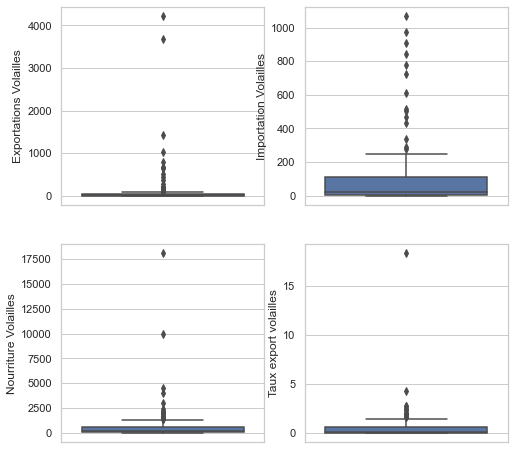

In [81]:
# VERIFICATION DE LA DISTRIBUTION DES VARIABLES DE TOUS LES INDIVIDUS
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=X,  y='Exportations Volailles')
plt.subplot(222)
sns.boxplot(data=X,  y='Importation Volailles')
plt.subplot(223)
sns.boxplot(data=X,  y='Nourriture Volailles')
plt.subplot(224)
sns.boxplot(data=X,  y='Taux export volailles')

<AxesSubplot:ylabel='Taux évolution Population 10 ans'>

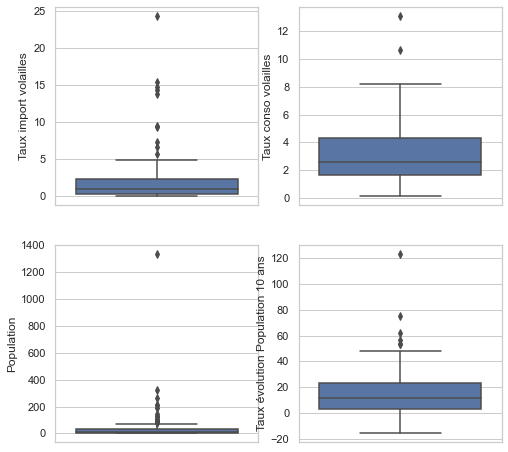

In [82]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=X,  y='Taux import volailles')
plt.subplot(222)
sns.boxplot(data=X,  y='Taux conso volailles')
plt.subplot(223)
sns.boxplot(data=X,  y='Population')
plt.subplot(224)
sns.boxplot(data=X,  y='Taux évolution Population 10 ans')

<AxesSubplot:ylabel='PIB'>

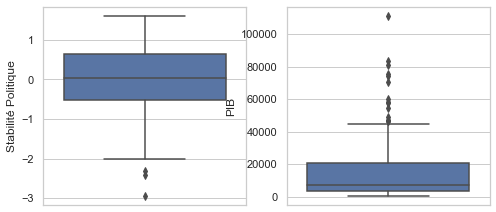

In [83]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=X,  y='Stabilité Politique')
plt.subplot(222)
sns.boxplot(data=X,  y='PIB')

In [6]:
# Centrage / réduction des données pour que nos données puissent prendre la même importance
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_scaler

array([[-0.13279546,  2.00264178,  0.70241091, ...,  0.05536407,
        -0.3145136 , -0.50769514],
       [-0.25446076, -0.33276864, -0.34394723, ..., -1.06815712,
         0.44379219, -0.58443935],
       [-0.25446076, -0.50939632, -0.22973208, ...,  0.32687967,
        -1.04984043, -0.60374908],
       ...,
       [-0.25446076, -0.51920897, -0.19815185, ..., -0.53148634,
        -0.07323448, -0.50332132],
       [ 6.87551171,  0.08426893,  9.15801631, ..., -1.47362511,
         0.34038686,  2.06050521],
       [-0.25446076, -0.48977103, -0.36710606, ...,  5.80976875,
         0.23698152, -0.6885679 ]])

In [7]:
# Calcul des composantes principales, avec 10 composentes
pca = PCA(n_components = 10)
pca.fit(X_scaler)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)

[0.24099009 0.19266678 0.13406805 0.10401465 0.09324914 0.07446208
 0.06299025 0.0531778  0.03282837 0.0115528 ]
[2.42843862 1.94148832 1.35099339 1.04814764 0.9396644  0.75034861
 0.6347479  0.53586858 0.33080893 0.11641669]


In [8]:
pcs = pca.components_

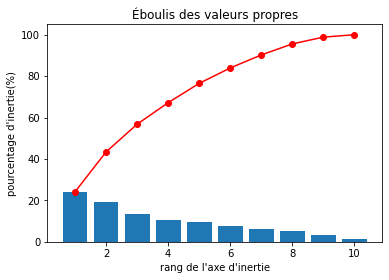

In [9]:
# Affichage d'un graphique 'Eboulis des valeur propres' pour déterminer le nombre de dimenssion a utiliser.
display_scree_plot(pca)

In [10]:
# Calcule de la variance et de la variance cumulé pour chaque dimenssion.
variance = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(10)], 
        "Variance" : pca.explained_variance_,
        "% variance" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. variance" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
variance

,Dimension,Variance,% variance,% cum. variance
0,Dim1,2.428439,24.0,24.0
1,Dim2,1.941488,19.0,43.0
2,Dim3,1.350993,13.0,57.0
3,Dim4,1.048148,10.0,67.0
4,Dim5,0.939664,9.0,76.0
5,Dim6,0.750349,7.0,84.0
6,Dim7,0.634748,6.0,90.0
7,Dim8,0.535869,5.0,96.0
8,Dim9,0.330809,3.0,99.0
9,Dim10,0.116417,1.0,100.0


#### On va choisir 4 composantes principales, car les 4 premières dimensions représentent 67% des informations importantes.

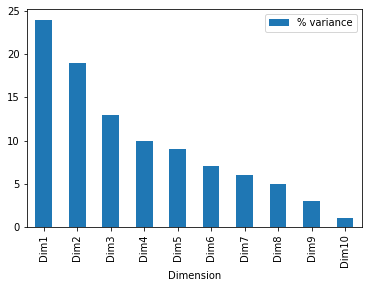

In [11]:
# Affichage de la variance cumulé sous forme de Graphiques en Bar
variance.plot.bar(x = "Dimension", y = "% variance")
plt.show()

In [12]:
X_pca = pca.transform(X)

In [13]:
# Création d'un df pour 4 dimenssion
X_pca_df = pd.DataFrame({
    'f1' : X_pca[:,0], 
    'f2' : X_pca[:,1],
    'f3' : X_pca[:,2], 
    'f4' : X_pca[:,3],
    'Pays' : étude_marché_volailles_complete['Zone'],
})
X_pca_df.head()

,f1,f2,f3,f4,Pays
0,3245.789247,-1205.554295,-2751.938666,11.038299,Afrique du Sud
1,1544.260666,-1399.798153,-2201.868639,136.073462,Albanie
2,1504.369446,-1170.636459,-1986.963581,63.582528,Algérie
3,16307.213825,-13288.994763,-21589.647683,1284.009892,Allemagne
4,1618.872936,-1195.278028,-1934.723225,202.606531,Angola


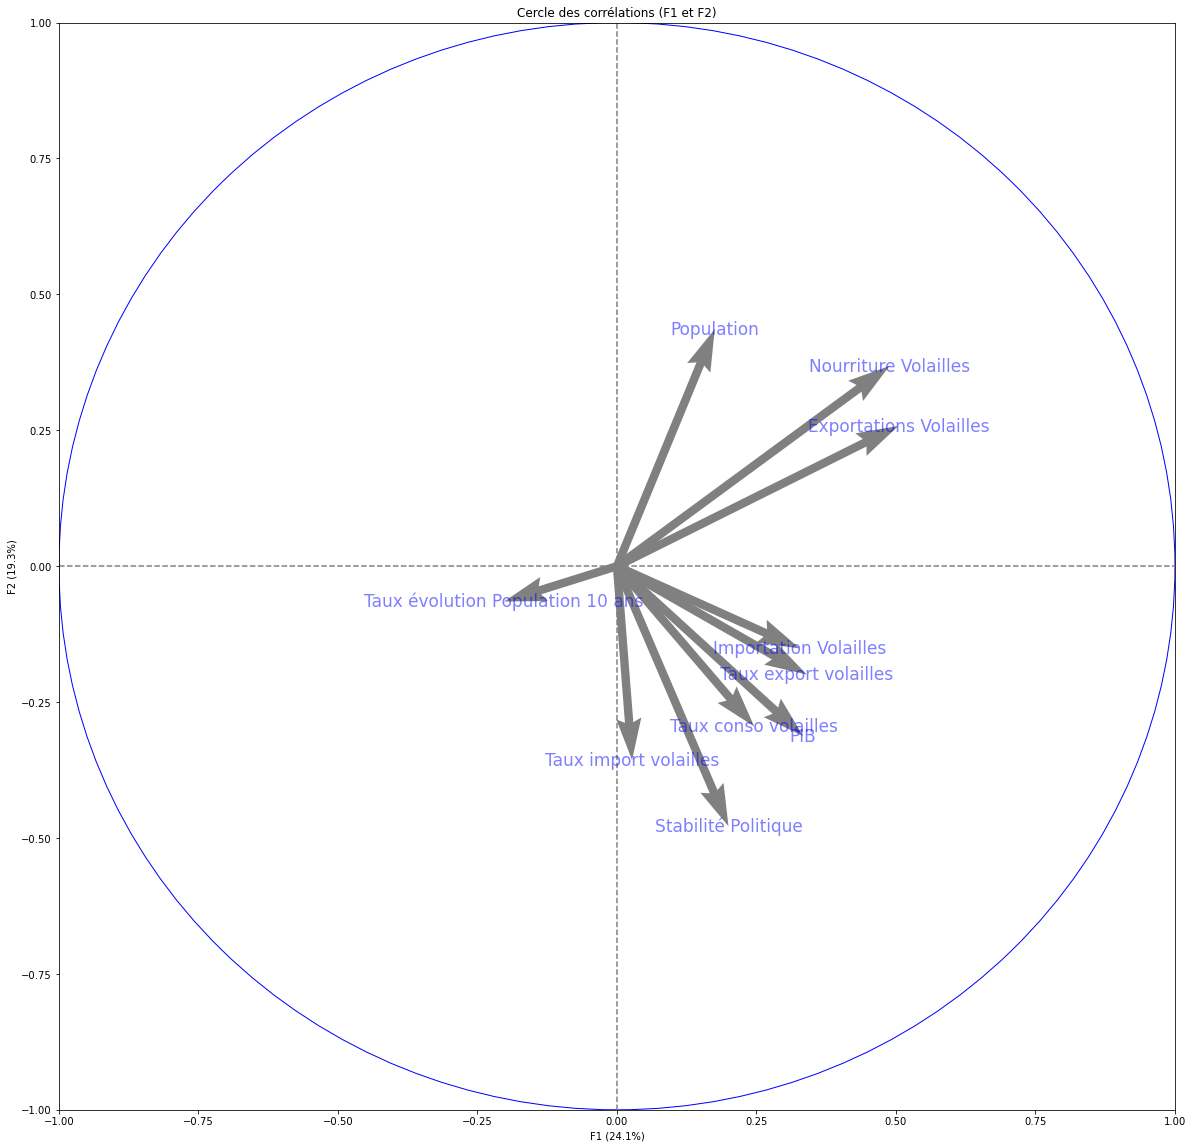

<Figure size 4320x1800 with 0 Axes>

In [14]:
# Cercle des corrélations en fonction de F1 et F2
display_circles(pcs, 10, pca, [(0,1)], labels = np.array(X.columns))

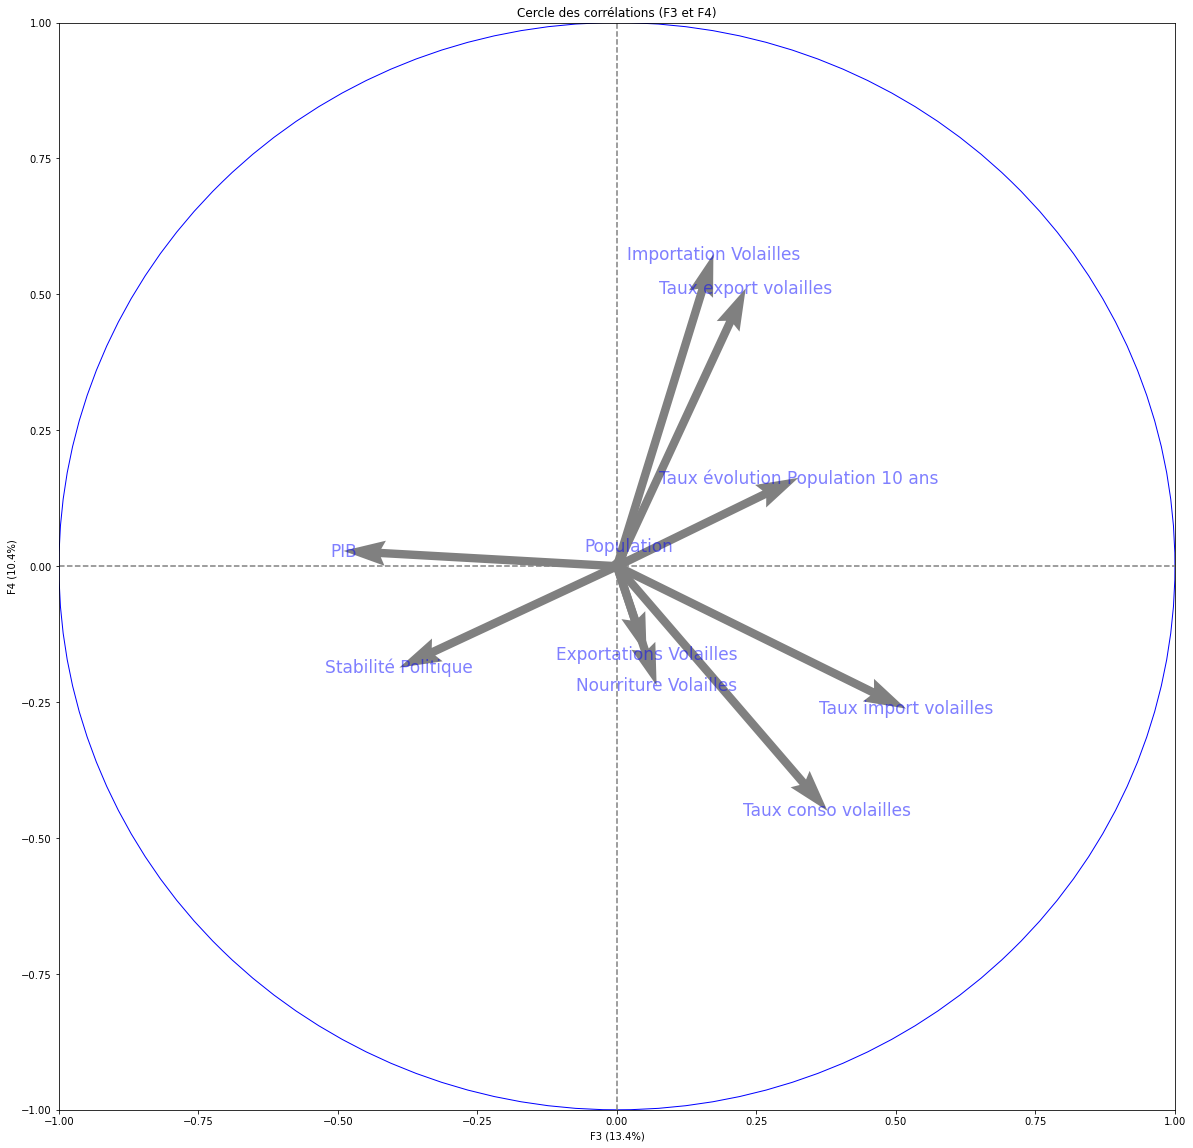

<Figure size 4320x1800 with 0 Axes>

In [15]:
# Cercle des corrélations en fonction de F3 et F4
display_circles(pcs, 10, pca, [(2,3)], labels = np.array(X.columns))

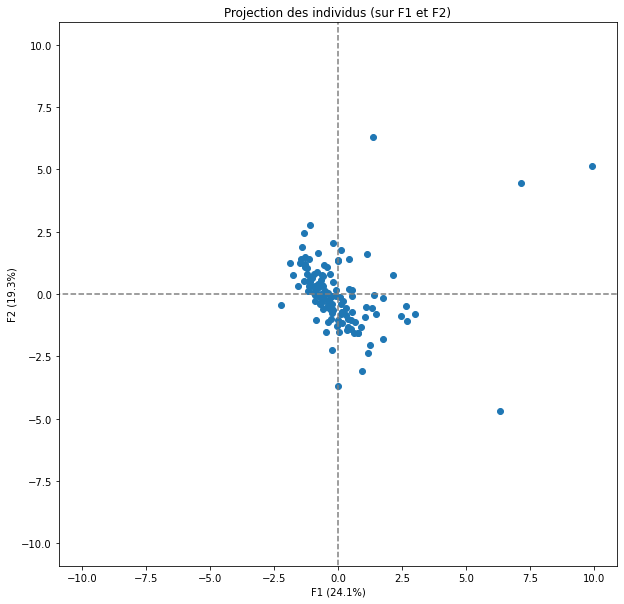

In [16]:
# Projection des individues en fonction de F1 et F2
X_projected = pca.transform(X_scaler)
display_factorial_planes(X_projected, 10, pca, [(0, 1)])

plt.show()

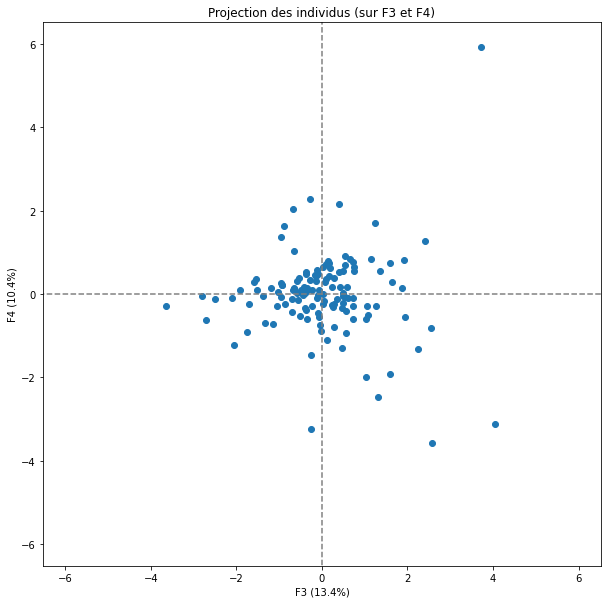

In [17]:
# Projection des individues en fonction de F3 et F4
display_factorial_planes(X_projected, 10, pca, [(2, 3)])

plt.show()

In [18]:
# Création DF avec les valeurs des composantes principales
df_ACP = pd.DataFrame(X_projected, index = X.index, columns = ["F" + str(i + 1) for i in range (10)]).reset_index()
df_ACP = df_ACP[['Zone','F1','F2','F3','F4']]
df_ACP.head()

,Zone,F1,F2,F3,F4
0,Afrique du Sud,1.099532,-0.514322,1.869159,0.134909
1,Albanie,-0.648675,-0.146321,-0.398455,-0.331565
2,Algérie,-1.272110,1.193013,-0.092410,0.481073
3,Allemagne,2.679731,-0.494121,-0.671140,2.039018
4,Angola,-0.238578,-0.063893,0.583237,0.173030


In [19]:
def plot_dendrogram(Z, names, figsize=(15,30)):
    '''Plot a dendrogram to illustrate hierarchical clustering'''

    plt.figure(figsize=figsize)
    plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
        leaf_font_size=12,
    )

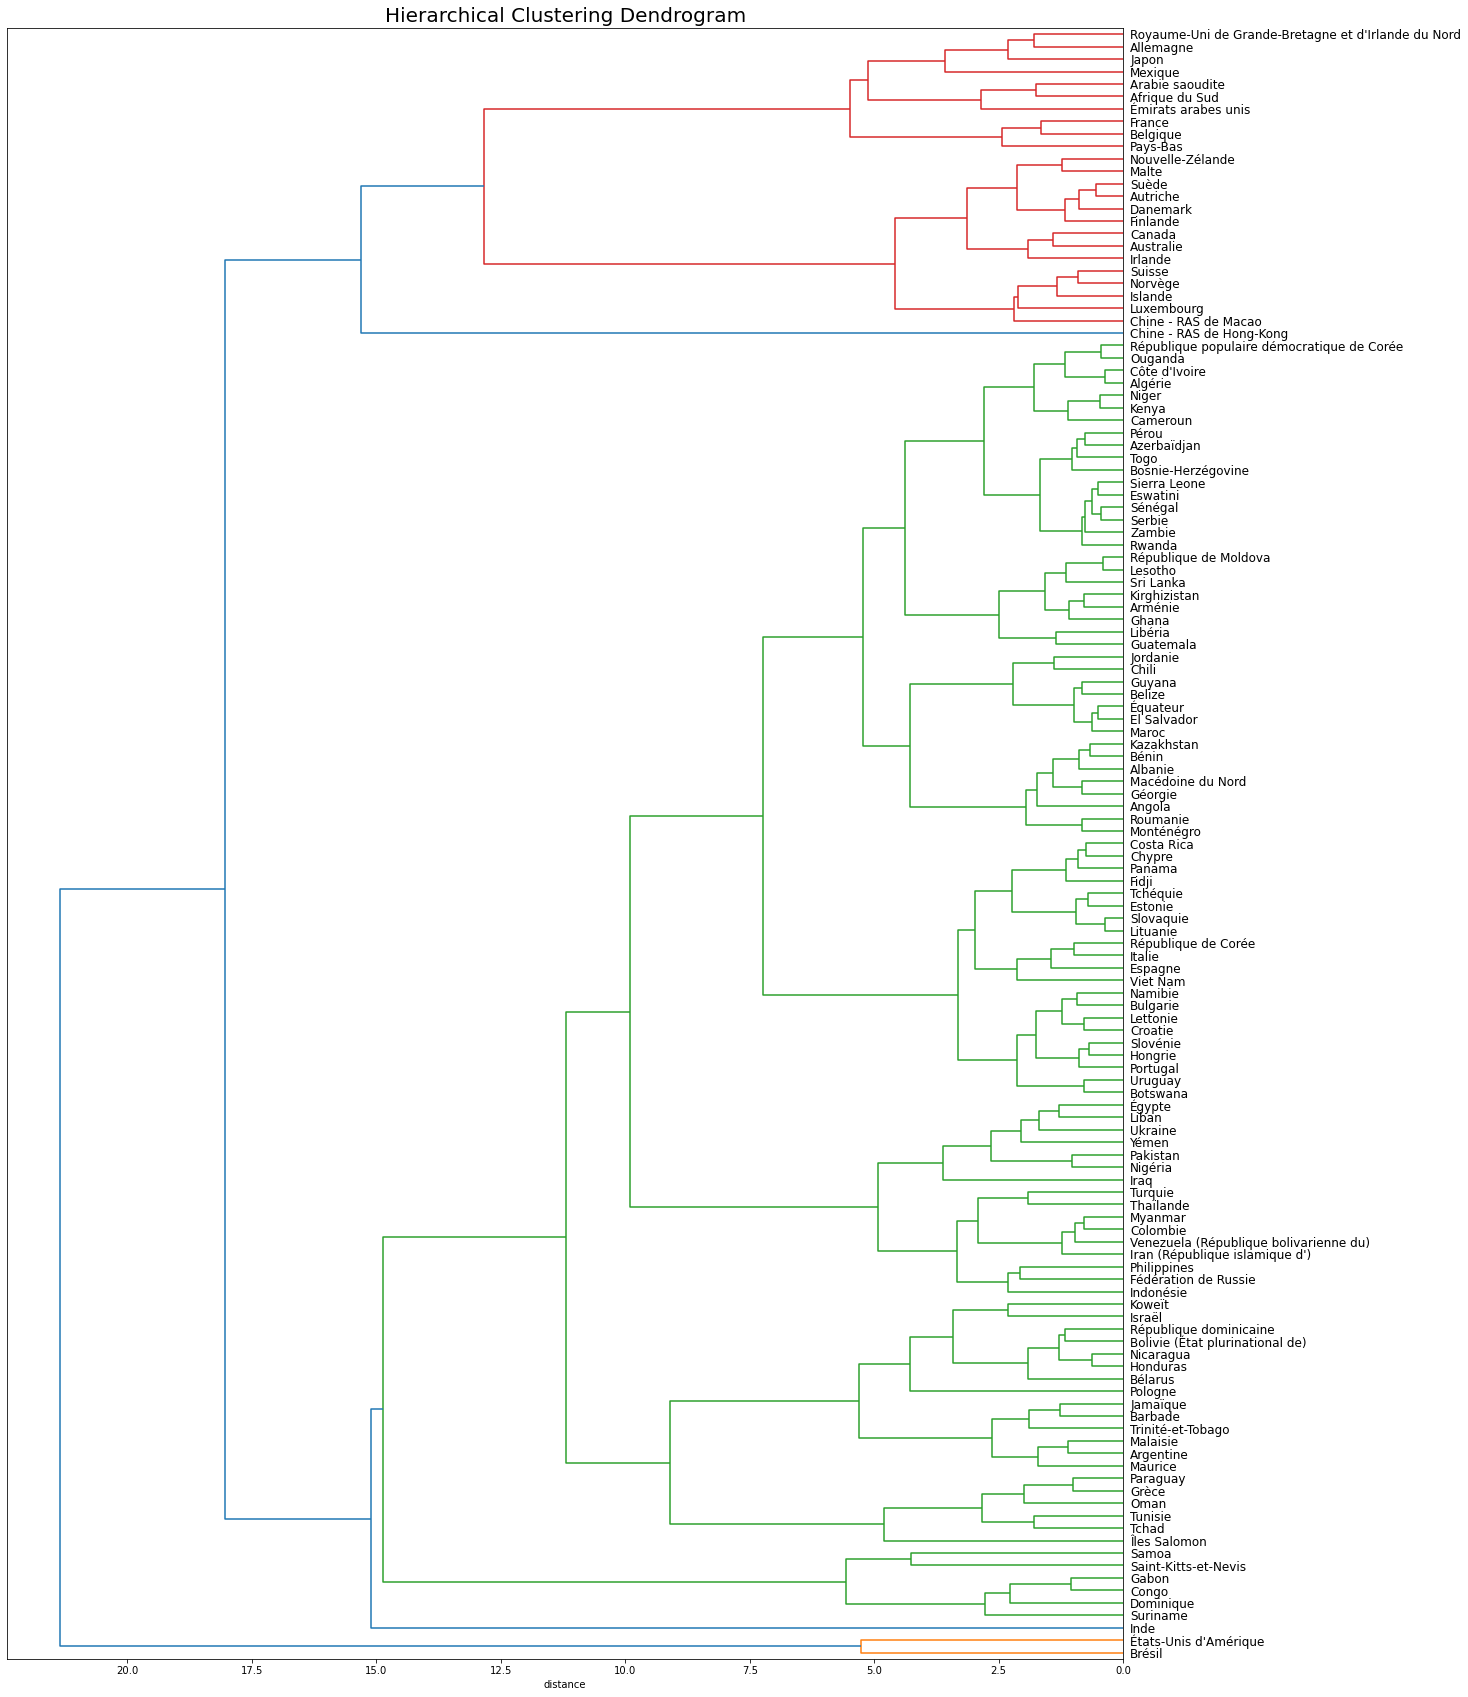

In [20]:
# Clustering hiérarchique
Z = linkage(X_scaler, 'ward')
names = X.index

# Affichage du dendrogramme
plot_dendrogram(Z, names,figsize=(20,30))

In [21]:
# Création d'un modèle de clustering hiérarchique
hiercluster = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward', compute_full_tree = True)

In [22]:
# Découpage du dendrogramme en 4 clusters
hiercluster.set_params(n_clusters = 4)
clusters = hiercluster.fit_predict(X_scaler)

In [23]:
# Ajout du numéro de cluster aux données originales
X_scaled_clustered = pd.DataFrame(X_scaler, columns = X.columns, index = X.index)
X_scaled_clustered['Cluster'] = clusters

X_scaled_clustered.head()

,Exportations Volailles,Importation Volailles,Nourriture Volailles,Taux export volailles,Taux import volailles,Taux conso volailles,Population,Taux évolution Population 10 ans,Stabilité Politique,PIB,Cluster
Zone,,,,,,,,,,,
Afrique du Sud,-0.132795,2.002642,0.702411,-0.011836,1.028996,1.477800,0.135605,0.055364,-0.314514,-0.507695,2
Albanie,-0.254461,-0.332769,-0.343947,-0.345616,0.625837,-0.814374,-0.297747,-1.068157,0.443792,-0.584439,0
Algérie,-0.254461,-0.509396,-0.229732,-0.345616,-0.609297,-1.036328,0.010540,0.326880,-1.049840,-0.603749,0
Allemagne,0.993091,3.611916,0.478191,0.292875,-0.247823,-0.470214,0.340960,-0.713094,0.685071,1.331580,2
Angola,-0.254461,0.839843,-0.202889,-0.345616,1.308778,-0.565538,-0.082113,-1.171666,-0.429408,-0.604412,0


In [24]:
# Affichage de la taille des clusters
X_scaled_clustered["Cluster"].value_counts()

0    104
2     24
1      2
3      1
Name: Cluster, dtype: int64

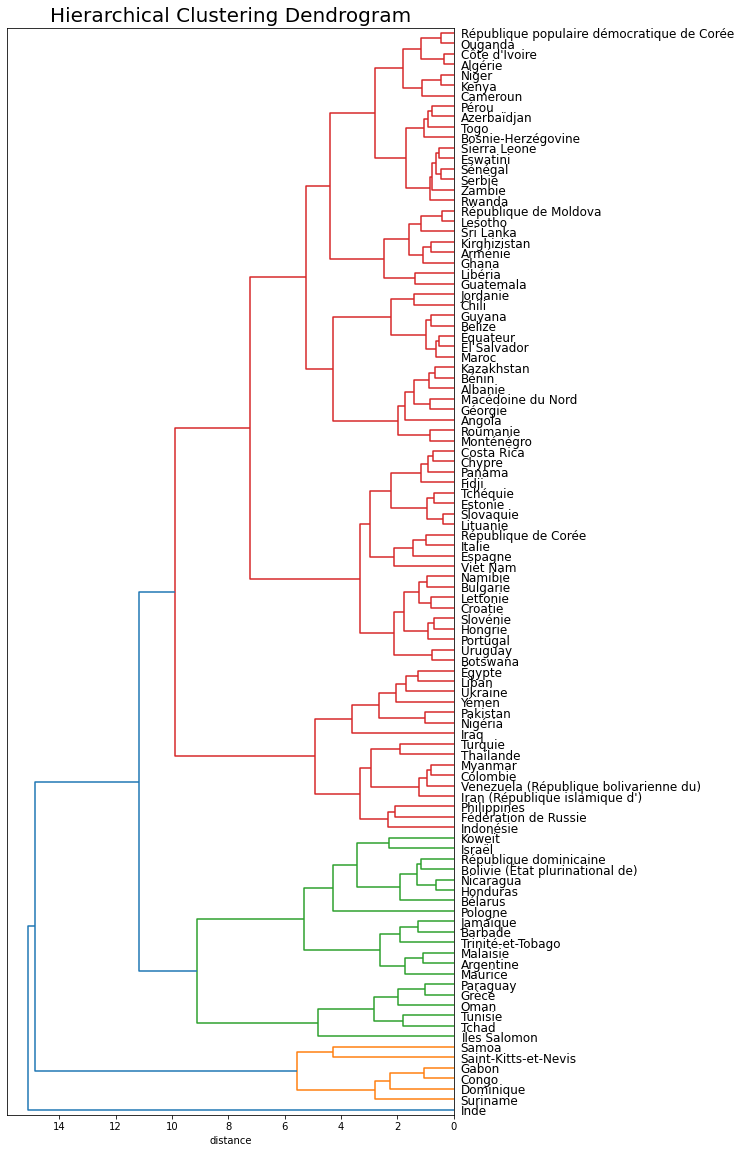

In [25]:
# Dendrogramme, pour le cluster 0 qui à la plus grande taille avec 104 observations
sample = X_scaled_clustered[X_scaled_clustered.Cluster == 0]
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize = (8,20))

In [26]:
# Création d'un modèle PCA pour réduire les données à 4 dimensions pour la visualisation.
pca = PCA(n_components = 4)
pca.fit(X_scaler)
X_reduced = pca.transform(X_scaler)

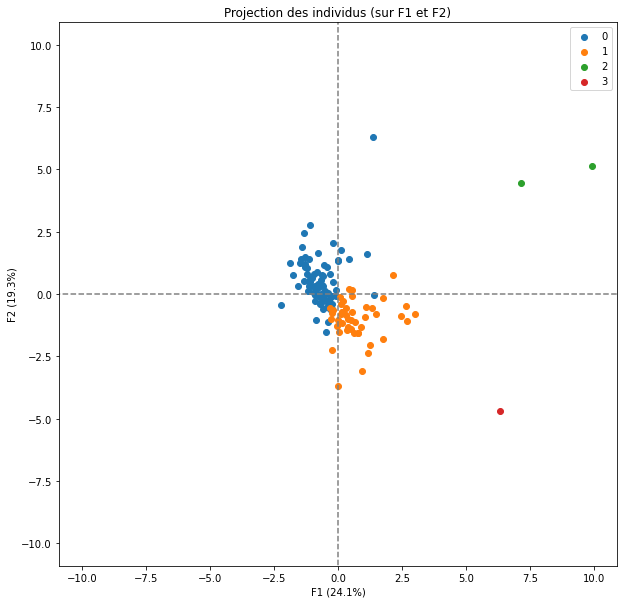

In [68]:
# Projection des individus sur F1 et F2
display_factorial_planes(X_reduced, 4, pca, [(0,1)], illustrative_var = clusters)

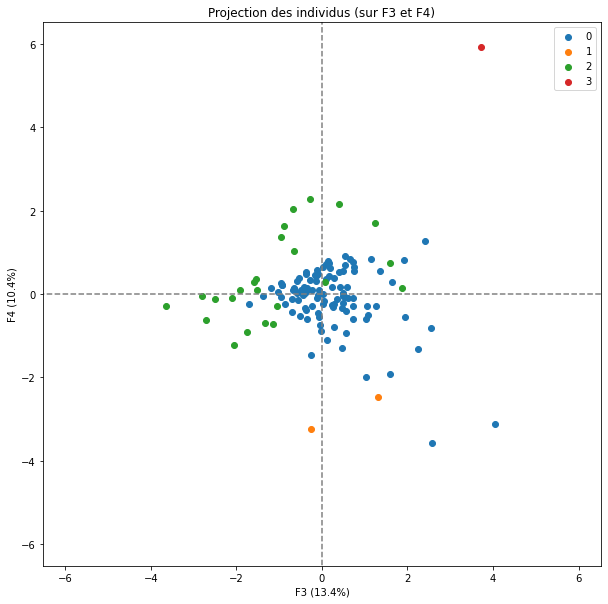

In [28]:
# Projection des individus sur F3 et F4
display_factorial_planes(X_reduced, 4, pca, [(2,3)], illustrative_var = clusters)

In [29]:
# Création d'un nouveau df.
X_clustered = X_scaled_clustered.reset_index()
X_clustered.head()

,Zone,Exportations Volailles,Importation Volailles,Nourriture Volailles,Taux export volailles,Taux import volailles,Taux conso volailles,Population,Taux évolution Population 10 ans,Stabilité Politique,PIB,Cluster
0,Afrique du Sud,-0.132795,2.002642,0.702411,-0.011836,1.028996,1.477800,0.135605,0.055364,-0.314514,-0.507695,2
1,Albanie,-0.254461,-0.332769,-0.343947,-0.345616,0.625837,-0.814374,-0.297747,-1.068157,0.443792,-0.584439,0
2,Algérie,-0.254461,-0.509396,-0.229732,-0.345616,-0.609297,-1.036328,0.010540,0.326880,-1.049840,-0.603749,0
3,Allemagne,0.993091,3.611916,0.478191,0.292875,-0.247823,-0.470214,0.340960,-0.713094,0.685071,1.331580,2
4,Angola,-0.254461,0.839843,-0.202889,-0.345616,1.308778,-0.565538,-0.082113,-1.171666,-0.429408,-0.604412,0


In [30]:
# Création df du Cluster 0
df_0 = X_clustered.loc[X_clustered['Cluster'] == 0].reset_index(drop = True)
df_0

,Zone,Exportations Volailles,Importation Volailles,Nourriture Volailles,Taux export volailles,Taux import volailles,Taux conso volailles,Population,Taux évolution Population 10 ans,Stabilité Politique,PIB,Cluster
0,Albanie,-0.254461,-0.332769,-0.343947,-0.345616,0.625837,-0.814374,-0.297747,-1.068157,0.443792,-0.584439,0
1,Algérie,-0.254461,-0.509396,-0.229732,-0.345616,-0.609297,-1.036328,0.010540,0.326880,-1.049840,-0.603749,0
2,Angola,-0.254461,0.839843,-0.202889,-0.345616,1.308778,-0.565538,-0.082113,-1.171666,-0.429408,-0.604412,0
3,Argentine,0.145297,-0.479958,0.608197,-0.156572,-0.544271,1.041011,0.030940,-0.078143,0.202513,-0.100650,0
4,Arménie,-0.254461,-0.347488,-0.343947,-0.345616,0.579316,-0.683486,-0.297262,0.201061,-0.705156,-0.613066,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,Yémen,-0.254461,-0.136516,-0.243943,-0.345616,-0.245804,-0.132979,-0.097982,-0.029256,-3.370716,-0.764363,0
100,Zambie,-0.252530,-0.460333,-0.338158,-0.275688,0.043594,-0.960960,-0.185902,-0.637153,0.179534,-0.726661,0
101,Égypte,-0.252530,0.020487,0.289236,-0.333615,-0.489208,-0.617638,0.451322,0.139522,-1.624315,-0.703344,0
102,Équateur,-0.254461,-0.519209,-0.198152,-0.345616,-0.612218,0.138658,-0.186448,-0.531486,-0.073234,-0.503321,0


In [31]:
# Création df du Cluster 1
df_1 = X_clustered.loc[X_clustered['Cluster'] == 1].reset_index(drop = True)
df_1

,Zone,Exportations Volailles,Importation Volailles,Nourriture Volailles,Taux export volailles,Taux import volailles,Taux conso volailles,Population,Taux évolution Population 10 ans,Stabilité Politique,PIB,Cluster
0,Brésil,7.900976,-0.504490,4.885212,1.249453,-0.607325,1.396888,1.343167,-0.821054,-0.532814,-0.325973,1
1,États-Unis d'Amérique,6.875512,0.084269,9.158016,0.689421,-0.570298,1.122412,2.281928,-1.473625,0.340387,2.060505,1


In [32]:
# Création df du Cluster 2
df_2 = X_clustered.loc[X_clustered['Cluster'] == 2].reset_index(drop = True)
df_2

,Zone,Exportations Volailles,Importation Volailles,Nourriture Volailles,Taux export volailles,Taux import volailles,Taux conso volailles,Population,Taux évolution Population 10 ans,Stabilité Politique,PIB,Cluster
0,Afrique du Sud,-0.132795,2.002642,0.702411,-0.011836,1.028996,1.477800,0.135605,0.055364,-0.314514,-0.507695,2
1,Allemagne,0.993091,3.611916,0.478191,0.292875,-0.247823,-0.470214,0.340960,-0.713094,0.685071,1.331580,2
2,Arabie saoudite,-0.235149,3.023157,0.386609,-0.086314,0.175030,2.158312,-0.055817,-0.090545,-0.728135,0.193101,2
3,Australie,-0.173351,-0.440708,0.247656,-0.298939,-0.540651,0.957468,-0.124004,0.877708,1.041245,1.951055,2
4,Autriche,-0.103828,0.020487,-0.284471,0.233771,-0.278205,-0.522021,-0.250223,-0.230642,1.213587,1.458426,2
5,Belgique,1.012403,1.139129,-0.292893,0.830270,-0.361967,-0.838259,-0.229408,-0.116506,0.501240,1.301701,2
6,Canada,0.060324,0.373742,0.385556,-0.202547,-0.344164,0.496100,-0.026746,0.136291,1.271035,1.343749,2
7,Chine - RAS de Macao,-0.254461,-0.406364,-0.357632,-0.345616,0.742433,0.700039,-0.315854,-1.138813,1.650188,3.068804,2
8,Danemark,0.013975,0.133332,-0.281313,0.296351,-0.079013,-0.046316,-0.274944,-0.505758,1.006777,1.965850,2
9,Finlande,-0.231286,-0.440708,-0.314472,0.014940,-0.458970,-0.631933,-0.276713,-1.024178,1.248056,1.414341,2


In [33]:
# Création df du Cluster 3
df_3 = X_clustered.loc[X_clustered['Cluster'] == 3].reset_index(drop = True)
df_3

,Zone,Exportations Volailles,Importation Volailles,Nourriture Volailles,Taux export volailles,Taux import volailles,Taux conso volailles,Population,Taux évolution Population 10 ans,Stabilité Politique,PIB,Cluster
0,Chine - RAS de Hong-Kong,1.025922,3.930827,-0.162887,10.329534,2.095626,1.692889,-0.262342,-0.097609,0.960819,1.429592,3


<AxesSubplot:xlabel='Cluster', ylabel='Taux export volailles'>

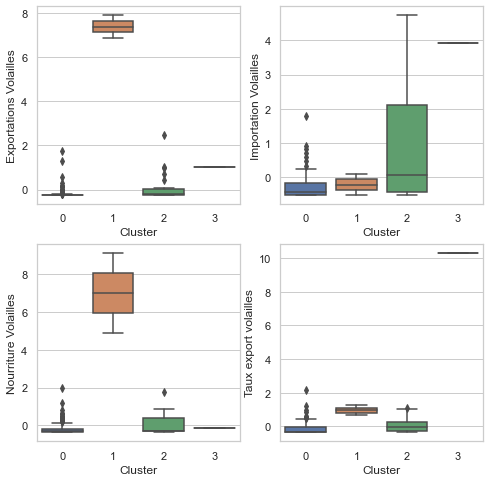

In [86]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=X_clustered, x='Cluster', y='Exportations Volailles')
plt.subplot(222)
sns.boxplot(data=X_clustered, x='Cluster', y='Importation Volailles')
plt.subplot(223)
sns.boxplot(data=X_clustered, x='Cluster', y='Nourriture Volailles')
plt.subplot(224)
sns.boxplot(data=X_clustered, x='Cluster', y='Taux export volailles')

<AxesSubplot:xlabel='Cluster', ylabel='Taux évolution Population 10 ans'>

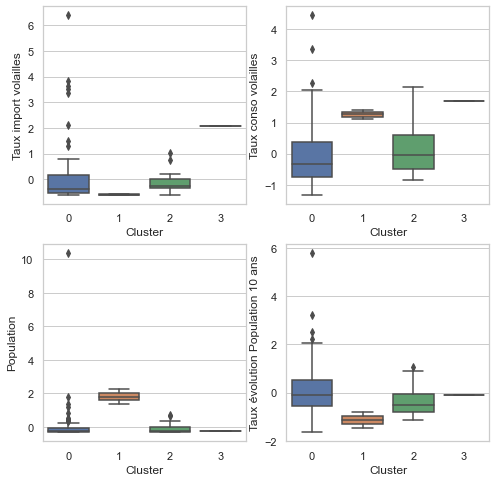

In [87]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=X_clustered, x='Cluster', y='Taux import volailles')
plt.subplot(222)
sns.boxplot(data=X_clustered, x='Cluster', y='Taux conso volailles')
plt.subplot(223)
sns.boxplot(data=X_clustered, x='Cluster', y='Population')
plt.subplot(224)
sns.boxplot(data=X_clustered, x='Cluster', y='Taux évolution Population 10 ans')

<AxesSubplot:xlabel='Cluster', ylabel='PIB'>

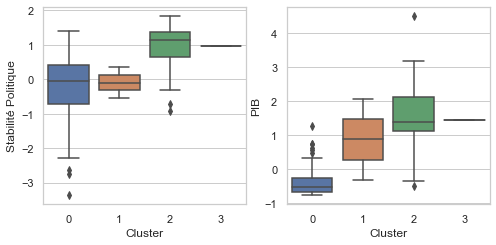

In [88]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=X_clustered, x='Cluster', y='Stabilité Politique')
plt.subplot(222)
sns.boxplot(data=X_clustered, x='Cluster', y='PIB')

In [89]:
# Création df des moyen de chaques variables par Cluster
X_clustered_mean = X_clustered.groupby('Cluster').mean()
X_clustered_mean

,Exportations Volailles,Importation Volailles,Nourriture Volailles,Taux export volailles,Taux import volailles,Taux conso volailles,Population,Taux évolution Population 10 ans,Stabilité Politique,PIB
Cluster,,,,,,,,,,
0,-0.173889,-0.268798,-0.148519,-0.134724,0.023723,-0.071765,-0.013033,0.103937,-0.218842,-0.401706
1,7.388244,-0.210111,7.021614,0.969437,-0.588812,1.259650,1.812548,-1.147340,-0.096213,0.867266
2,0.095086,1.018515,0.065236,0.072620,-0.141048,0.135476,-0.083640,-0.350716,0.916297,1.608886
3,1.025922,3.930827,-0.162887,10.329534,2.095626,1.692889,-0.262342,-0.097609,0.960819,1.429592


<AxesSubplot:ylabel='Cluster'>

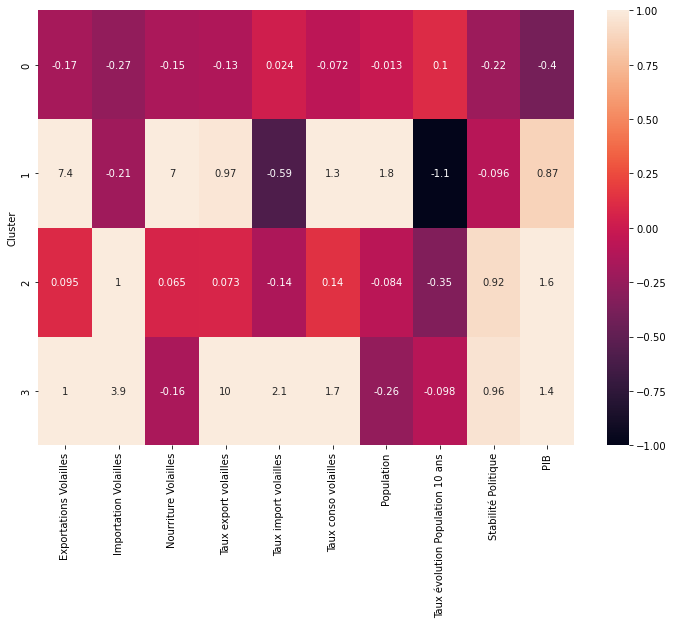

In [35]:
# heatmap de corrélations entre les différentes variables et les Cluster
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(X_clustered_mean, annot = True, vmin = -1, vmax = 1)

- On peut déjà constater que:<br> 

- les pays du cluster 2 et 3 sont caractérisé par un PIB important, une stabilité politique et un fort taux d'importation. <br> 

- Les pays du cluster 0 et 1 quant à eux sont caractérisés par un taux d'importation faible et une instabilité politique 

<b style="color:red">Via cette Méthode nous pouvons déjà établir un premier jet dans notre analyse quand à l'expenssion a l'international.
Il nous faut prendre en compte : 
    - Un taux de stabilitépolique élevé
    - un taux d'exportation faible
    - Un taux d'importation élevé
 </b> 
 
<b style="color:red"> 
Au vue de notre Heatmap, Je recommande les pays des clusters 2 et 3
    
</b>

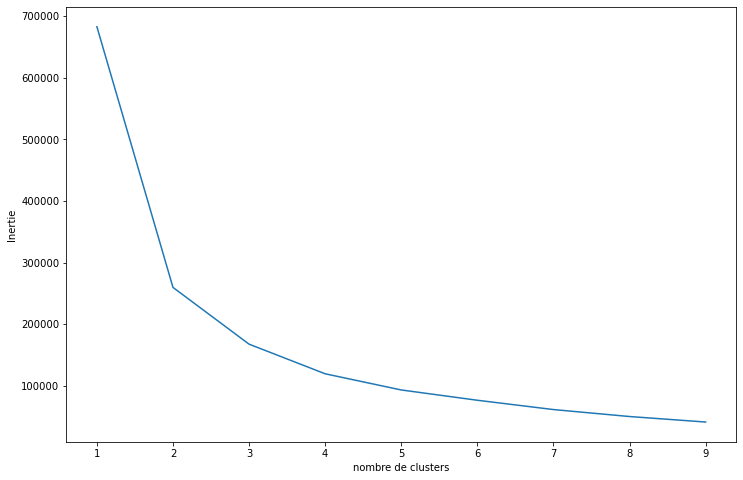

In [45]:
# Méthode du coude
inertia = []
k_range = range(1,10)
for k in k_range:
    model = KMeans(n_clusters = k).fit(Z)
    inertia.append(model.inertia_)
    
fig = plt.figure(figsize = (12,8))
plt.plot(k_range,inertia )
plt.xlabel('nombre de clusters')
plt.ylabel('Inertie')
plt.show()

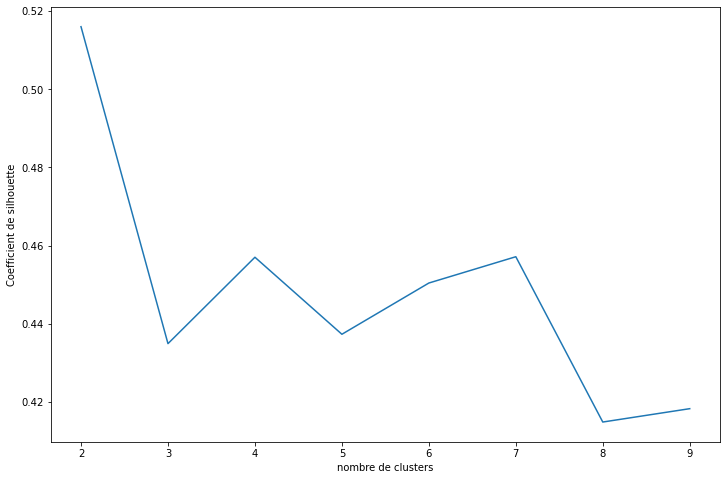

[0.5160129729969818,
 0.4349357661356675,
 0.4570360188026546,
 0.4373323747355122,
 0.45044061878890224,
 0.45716847026054747,
 0.414881813900309,
 0.4182990960217833]

In [46]:
# Méthode du coefficient de silhouette
tab_silhouette =[]
k_range = range(2,10)
for k in k_range:
    model = KMeans(n_clusters = k)
    cluster_labels = model.fit_predict(Z)
    tab_silhouette.append(silhouette_score(Z,cluster_labels))

fig = plt.figure(figsize = (12,8))
plt.plot(k_range,tab_silhouette)
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.show()
tab_silhouette

### Avec le graphique ci-dessus, le nombre de clusters idéal se situe entre 4 et 6.
#### Test avec différents nombre de clusters pour garder le meilleur

Time: 0.10721206665039062
[[-0.20022636 -0.27839022 -0.13183338 -0.21296495 -0.15511726 -0.4275563
   0.08143234  0.1007757  -0.5926548  -0.59548887]
 [-0.02475199  0.29524088 -0.07836317  0.05473336  0.18304358  0.47449759
  -0.16474791 -0.08684931  0.74826346  0.70912632]
 [ 7.38824402 -0.21011053  7.02161405  0.96943712 -0.58881173  1.25964998
   1.8125479  -1.14733971 -0.09621345  0.86726619]
 [ 1.02592162  3.93082727 -0.16288727 10.32953417  2.09562572  1.69288869
  -0.26234151 -0.09760918  0.96081887  1.42959211]]
[1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 2 1 0 0 0 1 1 3 1 1 0 0 1 0 0 1 1 0 1 1
 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1
 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 2 0]
Inertia : 790.85
Nombre Iteration : 9.00
Time: 0.07850909233093262
[[-0.17791521 -0.25748878 -0.16246194 -0.144137    0.06454405 -0.03647665
  -0.11495091  0.12590933 -0.25915519 -0.44572683]
 [ 7.38824402 -

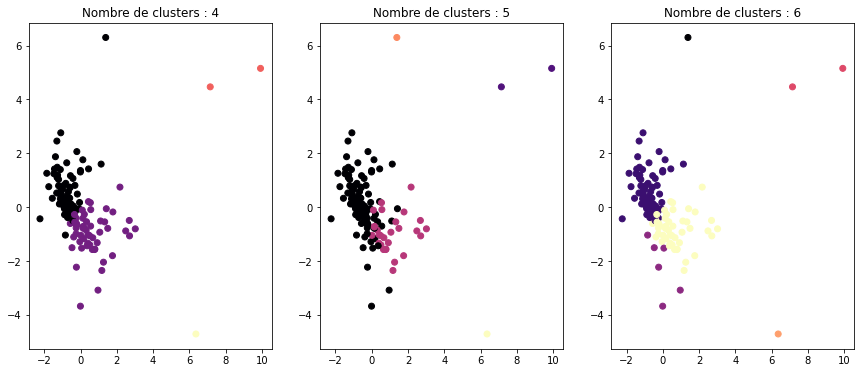

In [72]:
fig = plot.figure(figsize=(20,6))
km4 = KMeans(n_clusters=4)
start = time.time()
km4.fit(X_scaler)
ax = fig.add_subplot(142)
ax.scatter(X_projected[:,0], X_projected[:,1], c=km4.labels_, cmap='magma')
ax.set_title("Nombre de clusters : 4")
end = time.time()
print(f'Time: {end - start}')
print(km4.cluster_centers_)
print(km4.labels_)
print("Inertia : {:.2f}".format(km4.inertia_))
print("Nombre Iteration : {:.2f}".format(km4.n_iter_))

km5 = KMeans(n_clusters=5)
start = time.time()
km5.fit(X_scaler)
ax = fig.add_subplot(143)
ax.scatter(X_projected[:,0], X_projected[:,1], c=km5.labels_, cmap='magma')
ax.set_title("Nombre de clusters : 5")
end = time.time()
print(f'Time: {end - start}')
print(km5.cluster_centers_)
print(km5.labels_)
print("Inertia : {:.2f}".format(km5.inertia_))
print("Nombre Iteration : {:.2f}".format(km5.n_iter_))

km6 = KMeans(n_clusters=6)
start = time.time()
km6.fit(X_scaler)
ax = fig.add_subplot(144)
ax.scatter(X_projected[:,0], X_projected[:,1], c=km6.labels_, cmap='magma')
ax.set_title("Nombre de clusters : 6")
end = time.time()
print(f'Time: {end - start}')
print(km6.cluster_centers_)
print(km6.labels_)
print("Inertia : {:.2f}".format(km6.inertia_))
print("Nombre Iteration : {:.2f}".format(km6.n_iter_))

### Le K-means avec 4 clusters parait le plus pertinant.

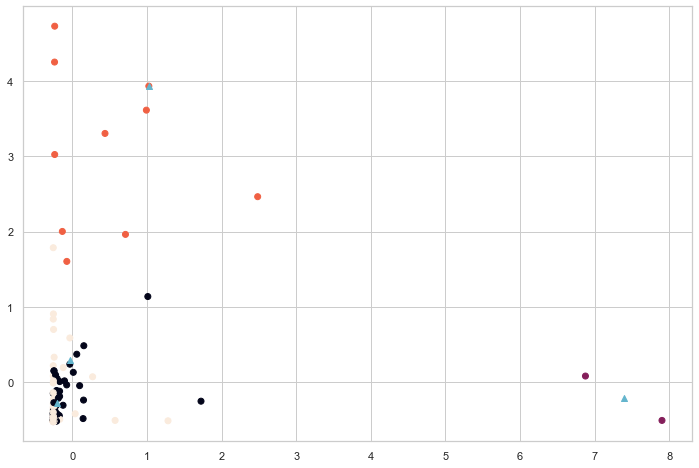

In [98]:
# Affichage du nuage de points (individus) en 4 Cluster avec centroide. 
# Centroïde = point du jeu de données qui défini le "centre" d’un cluster, il qu'est définie l’appartenance 
#au cluster.
fig = plt.figure(figsize = (10,8))
model = KMeans(n_clusters = 4)
model.fit(X_scaler)
plt.scatter(X_scaler[:,0], X_scaler[:,1],c=model.predict(X_scaler))
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1], marker='^',c='c')
plt.show()

In [49]:
# Récupération des clusters attribués à chaque individu
clusters = model.labels_

In [50]:
# Ajout du nombre de clusters aux données originelles
X_scaled_clustered = pd.DataFrame(X_scaler, columns=X.columns, index=X.index)
X_scaled_clustered['Groupe'] = clusters

df3=X_scaled_clustered.reset_index()
df3

,Zone,Exportations Volailles,Importation Volailles,Nourriture Volailles,Taux export volailles,Taux import volailles,Taux conso volailles,Population,Taux évolution Population 10 ans,Stabilité Politique,PIB,Groupe
0,Afrique du Sud,-0.132795,2.002642,0.702411,-0.011836,1.028996,1.477800,0.135605,0.055364,-0.314514,-0.507695,1
1,Albanie,-0.254461,-0.332769,-0.343947,-0.345616,0.625837,-0.814374,-0.297747,-1.068157,0.443792,-0.584439,0
2,Algérie,-0.254461,-0.509396,-0.229732,-0.345616,-0.609297,-1.036328,0.010540,0.326880,-1.049840,-0.603749,0
3,Allemagne,0.993091,3.611916,0.478191,0.292875,-0.247823,-0.470214,0.340960,-0.713094,0.685071,1.331580,1
4,Angola,-0.254461,0.839843,-0.202889,-0.345616,1.308778,-0.565538,-0.082113,-1.171666,-0.429408,-0.604412,0
...,...,...,...,...,...,...,...,...,...,...,...,...
126,Égypte,-0.252530,0.020487,0.289236,-0.333615,-0.489208,-0.617638,0.451322,0.139522,-1.624315,-0.703344,0
127,Émirats arabes unis,-0.072928,1.605229,-0.151834,0.765963,0.219949,1.701997,-0.244880,-0.859782,0.719540,1.140300,1
128,Équateur,-0.254461,-0.519209,-0.198152,-0.345616,-0.612218,0.138658,-0.186448,-0.531486,-0.073234,-0.503321,0
129,États-Unis d'Amérique,6.875512,0.084269,9.158016,0.689421,-0.570298,1.122412,2.281928,-1.473625,0.340387,2.060505,2


In [51]:
# Transfert des scaled data dans le nouvel espace ACP
X_reduced = pca.transform(X_scaler)
centres_reduced = pca.transform(model.cluster_centers_)

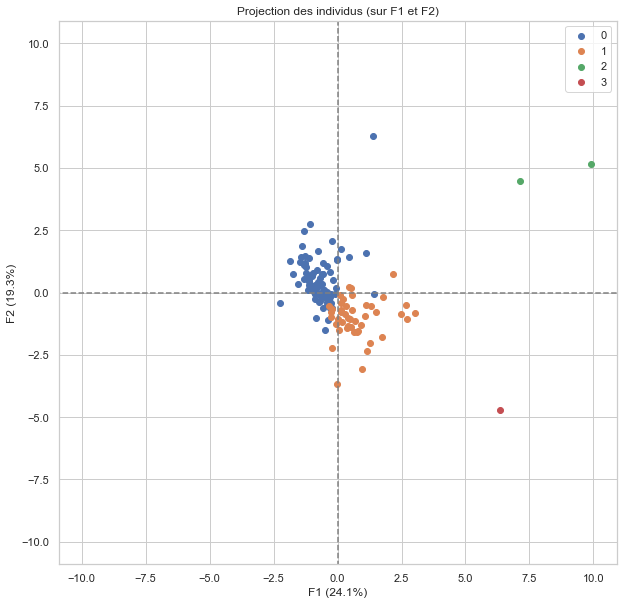

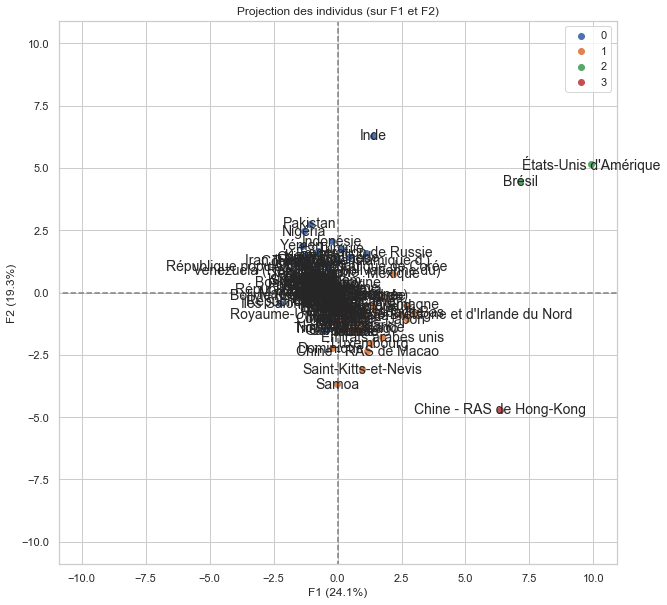

In [95]:
# Visualisation
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters)

# Visualisation avec noms des pays
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, labels = np.array(X.index))

In [53]:
# Affichage de la taille des clusters
df3["Groupe"].value_counts()

0    82
1    46
2     2
3     1
Name: Groupe, dtype: int64

In [54]:
g0 = df3.loc[df3['Groupe'] == 0].reset_index(drop = True)
g0

,Zone,Exportations Volailles,Importation Volailles,Nourriture Volailles,Taux export volailles,Taux import volailles,Taux conso volailles,Population,Taux évolution Population 10 ans,Stabilité Politique,PIB,Groupe
0,Albanie,-0.254461,-0.332769,-0.343947,-0.345616,0.625837,-0.814374,-0.297747,-1.068157,0.443792,-0.584439,0
1,Algérie,-0.254461,-0.509396,-0.229732,-0.345616,-0.609297,-1.036328,0.010540,0.326880,-1.049840,-0.603749,0
2,Angola,-0.254461,0.839843,-0.202889,-0.345616,1.308778,-0.565538,-0.082113,-1.171666,-0.429408,-0.604412,0
3,Arménie,-0.254461,-0.347488,-0.343947,-0.345616,0.579316,-0.683486,-0.297262,0.201061,-0.705156,-0.613066,0
4,Azerbaïdjan,-0.254461,-0.386738,-0.300788,-0.345616,-0.321407,-0.653359,-0.242013,-0.781759,-0.854519,-0.601784,0
...,...,...,...,...,...,...,...,...,...,...,...,...
77,Yémen,-0.254461,-0.136516,-0.243943,-0.345616,-0.245804,-0.132979,-0.097982,-0.029256,-3.370716,-0.764363,0
78,Zambie,-0.252530,-0.460333,-0.338158,-0.275688,0.043594,-0.960960,-0.185902,-0.637153,0.179534,-0.726661,0
79,Égypte,-0.252530,0.020487,0.289236,-0.333615,-0.489208,-0.617638,0.451322,0.139522,-1.624315,-0.703344,0
80,Équateur,-0.254461,-0.519209,-0.198152,-0.345616,-0.612218,0.138658,-0.186448,-0.531486,-0.073234,-0.503321,0


In [55]:
g1 = df3.loc[df3['Groupe'] == 1].reset_index(drop = True)
g1

,Zone,Exportations Volailles,Importation Volailles,Nourriture Volailles,Taux export volailles,Taux import volailles,Taux conso volailles,Population,Taux évolution Population 10 ans,Stabilité Politique,PIB,Groupe
0,Afrique du Sud,-0.132795,2.002642,0.702411,-0.011836,1.028996,1.477800,0.135605,0.055364,-0.314514,-0.507695,1
1,Allemagne,0.993091,3.611916,0.478191,0.292875,-0.247823,-0.470214,0.340960,-0.713094,0.685071,1.331580,1
2,Arabie saoudite,-0.235149,3.023157,0.386609,-0.086314,0.175030,2.158312,-0.055817,-0.090545,-0.728135,0.193101,1
3,Argentine,0.145297,-0.479958,0.608197,-0.156572,-0.544271,1.041011,0.030940,-0.078143,0.202513,-0.100650,1
4,Australie,-0.173351,-0.440708,0.247656,-0.298939,-0.540651,0.957468,-0.124004,0.877708,1.041245,1.951055,1
5,Autriche,-0.103828,0.020487,-0.284471,0.233771,-0.278205,-0.522021,-0.250223,-0.230642,1.213587,1.458426,1
6,Barbade,-0.254461,-0.509396,-0.361843,-0.345616,-0.371205,2.009686,-0.318547,-0.478253,1.121672,0.031602,1
7,Belgique,1.012403,1.139129,-0.292893,0.830270,-0.361967,-0.838259,-0.229408,-0.116506,0.501240,1.301701,1
8,Canada,0.060324,0.373742,0.385556,-0.202547,-0.344164,0.496100,-0.026746,0.136291,1.271035,1.343749,1
9,Chili,-0.032373,0.241271,-0.014987,0.419333,0.020548,1.015653,-0.172957,-0.305834,0.489750,-0.083943,1


In [56]:
g2 = df3.loc[df3['Groupe'] == 2].reset_index(drop = True)
g2

,Zone,Exportations Volailles,Importation Volailles,Nourriture Volailles,Taux export volailles,Taux import volailles,Taux conso volailles,Population,Taux évolution Population 10 ans,Stabilité Politique,PIB,Groupe
0,Brésil,7.900976,-0.504490,4.885212,1.249453,-0.607325,1.396888,1.343167,-0.821054,-0.532814,-0.325973,2
1,États-Unis d'Amérique,6.875512,0.084269,9.158016,0.689421,-0.570298,1.122412,2.281928,-1.473625,0.340387,2.060505,2


In [57]:
g3 = df3.loc[df3['Groupe'] == 3].reset_index(drop = True)
g3

,Zone,Exportations Volailles,Importation Volailles,Nourriture Volailles,Taux export volailles,Taux import volailles,Taux conso volailles,Population,Taux évolution Population 10 ans,Stabilité Politique,PIB,Groupe
0,Chine - RAS de Hong-Kong,1.025922,3.930827,-0.162887,10.329534,2.095626,1.692889,-0.262342,-0.097609,0.960819,1.429592,3


<AxesSubplot:xlabel='Groupe', ylabel='Taux export volailles'>

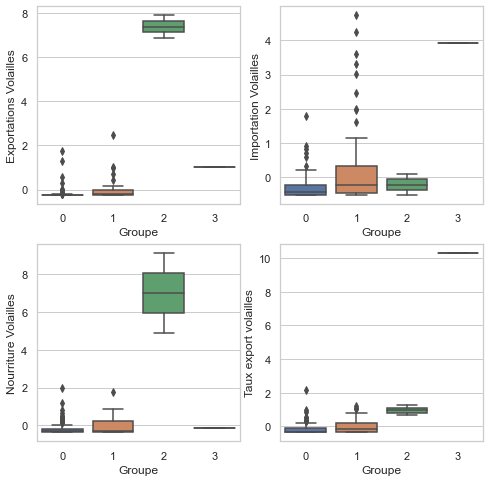

In [91]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes pour les K-means
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df3, x='Groupe', y='Exportations Volailles')
plt.subplot(222)
sns.boxplot(data=df3, x='Groupe', y='Importation Volailles')
plt.subplot(223)
sns.boxplot(data=df3, x='Groupe', y='Nourriture Volailles')
plt.subplot(224)
sns.boxplot(data=df3, x='Groupe', y='Taux export volailles')

<AxesSubplot:xlabel='Groupe', ylabel='Taux évolution Population 10 ans'>

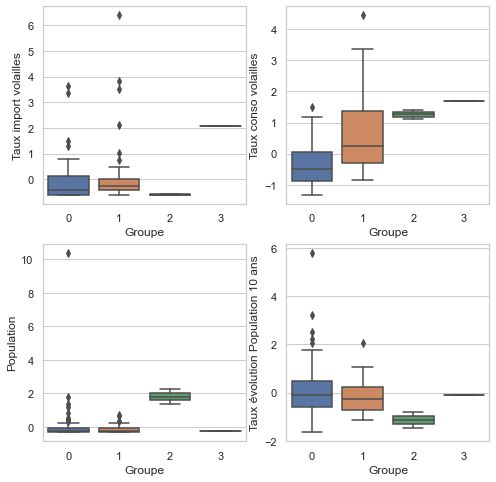

In [93]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df3, x='Groupe', y='Taux import volailles')
plt.subplot(222)
sns.boxplot(data=df3, x='Groupe', y='Taux conso volailles')
plt.subplot(223)
sns.boxplot(data=df3, x='Groupe', y='Population')
plt.subplot(224)
sns.boxplot(data=df3, x='Groupe', y='Taux évolution Population 10 ans')

<AxesSubplot:xlabel='Groupe', ylabel='PIB'>

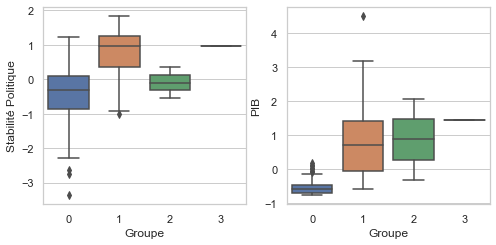

In [92]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df3, x='Groupe', y='Stabilité Politique')
plt.subplot(222)
sns.boxplot(data=df3, x='Groupe', y='PIB')

In [58]:
# Création df des moyen de chaques variables par Cluster
df3_means = df3.groupby('Groupe').mean()
df3_means

,Exportations Volailles,Importation Volailles,Nourriture Volailles,Taux export volailles,Taux import volailles,Taux conso volailles,Population,Taux évolution Population 10 ans,Stabilité Politique,PIB
Groupe,,,,,,,,,,
0,-0.177967,-0.274491,-0.148805,-0.163439,-0.104972,-0.394327,0.039379,0.123826,-0.435994,-0.535537
1,-0.026286,0.412993,-0.036486,0.024644,0.167167,0.611361,-0.143301,-0.168727,0.760502,0.885868
2,7.388244,-0.210111,7.021614,0.969437,-0.588812,1.259650,1.812548,-1.147340,-0.096213,0.867266
3,1.025922,3.930827,-0.162887,10.329534,2.095626,1.692889,-0.262342,-0.097609,0.960819,1.429592


<AxesSubplot:ylabel='Groupe'>

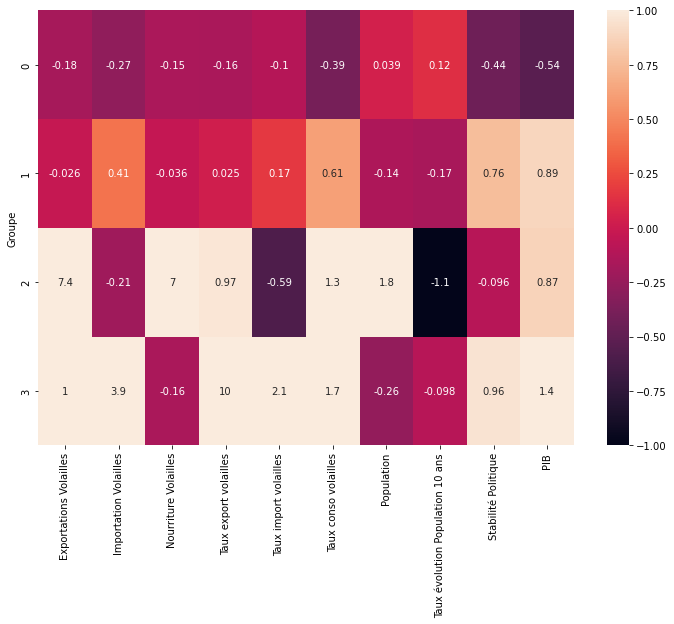

In [59]:
# heatmap de corrélations entre les différentes variables et les Clusters
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(df3_means, annot = True, vmin = -1, vmax = 1)

### - Le graphique de projection et heatmap, indique que:

####     - Pour le cluster 0, les pays ne sont influencés positivement que par la population et l'évolution de la population.

####     - Pour le cluster 1, presque tous les pays sont influencés positivement par toutes les variables sauf par les variables exportations, nourriture et populations(très faiblement).

####     - Pour le cluster 2, presque tous les pays sont influencés positivement par toutes les variables, sauf Importation volailles, le taux d'évolution de la population et la stabilité politique (très faiblement).

####     - Pour le cluster 3,  les pays sont influencés négativement par la nourriture, le taux d'évolution de la population ainsi que la population.



### Ce heatmap de k-means, indique que les cluster 1 le plus intéressant.

## Pays recommandés

In [64]:
g1["Zone"].reset_index()

,index,Zone
0,0,Afrique du Sud
1,1,Allemagne
2,2,Arabie saoudite
3,3,Argentine
4,4,Australie
5,5,Autriche
6,6,Barbade
7,7,Belgique
8,8,Canada
9,9,Chili
